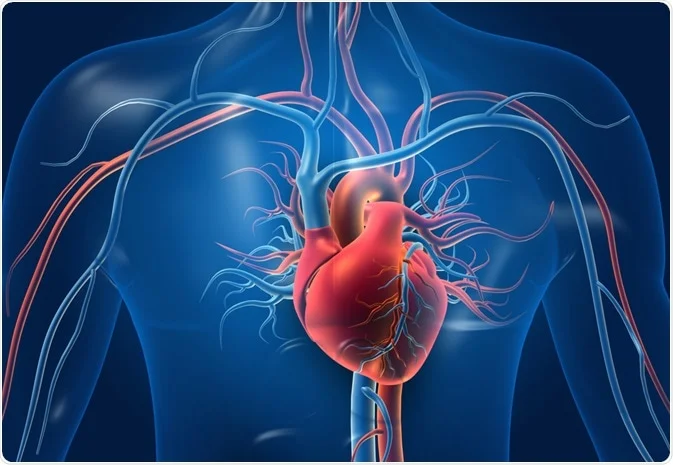

# <h1><center>Heart Failure Prediction</center></h1>

## Summary
- This notebook contains data from Kaggle.
- The information provided is about patients who have cardiovascular disease.
- This will be an attempt at being able to predict those whom are at risk based on the features below.

## Business Problem
Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the United States. One person will die every 36 seconds in the United States from cardiovascular disease. About 659,000 people in the United States die from heart disease each year. That turns out to be 1 in every 4 deaths. Heart disease costs the United States about $363 billion each year from 2016 to 2017. This includes the cost of health care services, medicines, and lost productivity due to death.

## Info on Data Set
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

Data and info found [here](https://www.kaggle.com/fedesoriano/heart-failure-prediction?select=heart.csv).

In [1]:
#Import Utilities
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt  

import category_encoders as ce

In [2]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
ls\

Heart Disease/       Images/
Heart_Failure.ipynb  README.md


In [5]:
df = pd.read_csv('Heart Disease/heart.csv')

## Initial Data Exploration
- Check out the columns and rows.
- Look for nulls and other issues worth cleaning up.
- What kind of features does the data set have?

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.isnull().values.any()

False

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
# Explore Categorical Columns
# Create a list of columns with the data type of object
cat_cols = [c for c in df.columns if df[c].dtype == 'object']
df[cat_cols].describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


## Chest Pain Type
- The type of chest pain is important.
- This feature is worth exploring.

In [12]:
df['ChestPainType'].value_counts()
# ChestPainType seems to be skewed towards Asymptomatic.
# This initially seems plausible.

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [13]:
df['ChestPainType'].describe()

count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object

## Resting BP
- Resting blood pressure is important.
- This feature is worth exploring because it should have some relation to the target of heart disease.

In [14]:
df['RestingBP'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
113      1
164      1
117      1
127      1
0        1
Name: RestingBP, Length: 67, dtype: int64

In [15]:
df['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

## Heart Disease
- This is the target.
- This is a binary classification 

In [16]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [17]:
#Explore Target percentages
df['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [18]:
df[[c for c in df.columns if df[c].dtype == 'object']].nunique().sort_values(ascending = False)

ChestPainType     4
ST_Slope          3
RestingECG        3
ExerciseAngina    2
Sex               2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Cholesterol'>

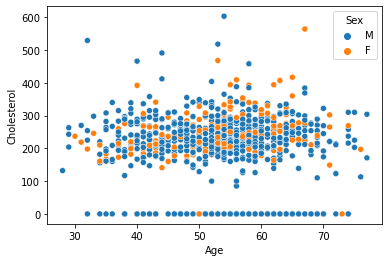

In [57]:
sns.scatterplot(data=df, x='Age',y='Cholesterol',hue='Sex')

## Train-Test-Split

In [19]:
# Define our X and y

X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# and train test split - to create our holdout set!
X_use, X_hold, y_use, y_hold = train_test_split(X, y, test_size=0.1, # saving 10%
                                                  random_state=42)

# and 2nd train test split - to create our test set!
X_train, X_test, y_train, y_test = train_test_split(X_use, y_use, test_size=0.25, # saving 25%
                                                  random_state=42)

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 734 to 300
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             619 non-null    int64  
 1   Sex             619 non-null    object 
 2   ChestPainType   619 non-null    object 
 3   RestingBP       619 non-null    int64  
 4   Cholesterol     619 non-null    int64  
 5   FastingBS       619 non-null    int64  
 6   RestingECG      619 non-null    object 
 7   MaxHR           619 non-null    int64  
 8   ExerciseAngina  619 non-null    object 
 9   Oldpeak         619 non-null    float64
 10  ST_Slope        619 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 58.0+ KB


In [21]:
# Set up lists for columns requiring different treatment
num_cols = []
ohe_cols = []
freq_cols = []

for c in X_train:
    if X_train[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X_train[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [22]:
print("NUMBER COLUMNS")
print(num_cols)
print('*'*10)
print("OHE COLUMNS")
print(ohe_cols)
print('*'*10)
print("FREQ COLUMNS")
print(freq_cols)

NUMBER COLUMNS
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
**********
OHE COLUMNS
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
**********
FREQ COLUMNS
[]


In [23]:
print(X_train['Sex'].value_counts())
print(X_train['ST_Slope'].value_counts())

M    487
F    132
Name: Sex, dtype: int64
Flat    321
Up      260
Down     38
Name: ST_Slope, dtype: int64


In [24]:
df.any(bool_only=None)

Age               True
Sex               True
ChestPainType     True
RestingBP         True
Cholesterol       True
FastingBS         True
RestingECG        True
MaxHR             True
ExerciseAngina    True
Oldpeak           True
ST_Slope          True
HeartDisease      True
dtype: bool

In [25]:
ohe_transformer = Pipeline(steps=[('oh_encoder', OneHotEncoder(handle_unknown='error'))])
preprocessor = ColumnTransformer(
    transformers=[('ohe', ohe_transformer, ohe_cols)])

In [26]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('ohe',
                                 Pipeline(steps=[('oh_encoder',
                                                  OneHotEncoder())]),
                                 ['Sex', 'ChestPainType', 'RestingECG',
                                  'ExerciseAngina', 'ST_Slope'])])

## Baseline Understanding

In [27]:
y_train.value_counts()

1    345
0    274
Name: HeartDisease, dtype: int64

In [28]:
y_train.value_counts(normalize=True)

1    0.557351
0    0.442649
Name: HeartDisease, dtype: float64

In [29]:
# Create a pipeline for default Desicion Tree Classifier
pipe_dtc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dtc', DecisionTreeClassifier(random_state=42))
])

In [30]:
#Cross validate on y_train
cv = cross_validate(pipe_dtc, X_train, y_train, return_train_score=True, \
                    scoring=['accuracy', 'precision','roc_auc'])
cv

{'fit_time': array([0.012959  , 0.00588822, 0.00604296, 0.00546098, 0.00614405]),
 'score_time': array([0.00955105, 0.00560999, 0.00521016, 0.0054009 , 0.00554109]),
 'test_accuracy': array([0.87096774, 0.7983871 , 0.83870968, 0.76612903, 0.7398374 ]),
 'train_accuracy': array([0.85454545, 0.86666667, 0.85454545, 0.86868687, 0.87701613]),
 'test_precision': array([0.90769231, 0.78205128, 0.88888889, 0.8030303 , 0.76811594]),
 'train_precision': array([0.87226277, 0.90697674, 0.88059701, 0.88363636, 0.87456446]),
 'test_roc_auc': array([0.90237154, 0.78471673, 0.88208169, 0.81370224, 0.79723564]),
 'train_roc_auc': array([0.929414  , 0.94263285, 0.92890113, 0.94208689, 0.94017622])}

In [31]:
pipe_dtc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('oh_encoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('dtc', DecisionTreeClassifier(random_state=42))])

In [32]:
#Make predictions for model
train_preds = pipe_dtc.predict(X_train)
train_probas = pipe_dtc.predict_proba(X_train)[:,1]
test_preds = pipe_dtc.predict(X_test)
test_probas = pipe_dtc.predict_proba(X_test)[:,1]

/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


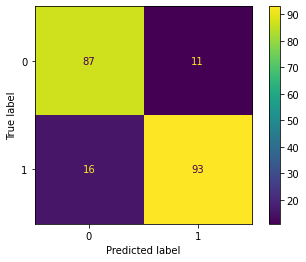

In [33]:
#Visualize Confusion Matrix
plot_confusion_matrix(pipe_dtc, X_test, y_test)

In [34]:
# Evaluate Train and Test Scores
print("Train Scores:")
print(f"Train Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Train Precision: {precision_score(y_train, train_preds)}")
print(f"Train Recall: {recall_score(y_train, train_preds)}")
print(f"Train F1-Score: {f1_score(y_train, train_preds)}")
print(f"Train Roc-Auc Score: {roc_auc_score(y_train, train_probas)}")
print("---------------")
print("Test Scores:")
print(f"Test Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Test Precision: {precision_score(y_test, test_preds)}")
print(f"Test Recall: {recall_score(y_test, test_preds)}")
print(f"Test F1-Score: {f1_score(y_test, test_preds)}")
print(f"Test Roc-Auc Score: {roc_auc_score(y_test, test_probas)}")

Train Scores:
Train Accuracy: 0.8578352180936996
Train Precision: 0.8790560471976401
Train Recall: 0.863768115942029
Train F1-Score: 0.8713450292397661
Train Roc-Auc Score: 0.9315296731196445
---------------
Test Scores:
Test Accuracy: 0.8695652173913043
Test Precision: 0.8942307692307693
Test Recall: 0.8532110091743119
Test F1-Score: 0.8732394366197184
Test Roc-Auc Score: 0.8645852836547463


## Random Forest Classifier

In [35]:
#Instantiate a Random Forest Classifier inside this new pipeline
pipe_rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfc', RandomForestClassifier(random_state=42))
])

In [36]:
#Cross Validate on X_train and y_train
cross_validate(pipe_rfc, X_train, y_train, return_train_score=True, \
               scoring=['accuracy', 'precision','roc_auc'])

{'fit_time': array([0.11962986, 0.09225106, 0.091501  , 0.09751916, 0.10032105]),
 'score_time': array([0.02333903, 0.01949906, 0.02407598, 0.02164984, 0.01997685]),
 'test_accuracy': array([0.84677419, 0.80645161, 0.83870968, 0.77419355, 0.7804878 ]),
 'train_accuracy': array([0.85454545, 0.86666667, 0.85454545, 0.86868687, 0.87701613]),
 'test_precision': array([0.86764706, 0.78481013, 0.88888889, 0.80597015, 0.79166667]),
 'train_precision': array([0.85664336, 0.88888889, 0.87777778, 0.88086643, 0.8668942 ]),
 'test_roc_auc': array([0.90079051, 0.82938076, 0.8859025 , 0.82529644, 0.84728932]),
 'train_roc_auc': array([0.92676692, 0.93986996, 0.92638641, 0.93967143, 0.93694829])}

In [37]:
#Fit the Model to X_train and y_train
pipe_rfc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('oh_encoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('rfc', RandomForestClassifier(random_state=42))])

In [38]:
#Make predictions with this model
train_preds = pipe_rfc.predict(X_train)
train_probas = pipe_rfc.predict_proba(X_train)[:,1]
test_preds = pipe_rfc.predict(X_test)
test_probas = pipe_rfc.predict_proba(X_test)[:,1]

/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


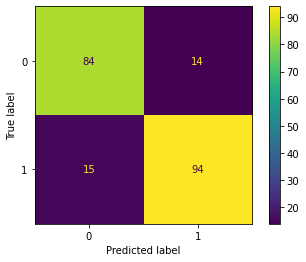

In [39]:
#Visualize Confusion Matrix
plot_confusion_matrix(pipe_rfc, X_test, y_test)

In [40]:
#Evaluate our Random Forest Model
print("Train Scores:")
print(f"Train Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Train Precision: {precision_score(y_train, train_preds)}")
print(f"Train Recall: {recall_score(y_train, train_preds)}")
print(f"Train F1-Score: {f1_score(y_train, train_preds)}")
print(f"Train Roc-Auc Score: {roc_auc_score(y_train, train_probas)}")
print("---------------")
print("Test Scores:")
print(f"Test Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Test Precision: {precision_score(y_test, test_preds)}")
print(f"Test Recall: {recall_score(y_test, test_preds)}")
print(f"Test F1-Score: {f1_score(y_test, test_preds)}")
print(f"Test Roc-Auc Score: {roc_auc_score(y_test, test_probas)}")

Train Scores:
Train Accuracy: 0.8578352180936996
Train Precision: 0.8660968660968661
Train Recall: 0.881159420289855
Train F1-Score: 0.8735632183908046
Train Roc-Auc Score: 0.9293504707500264
---------------
Test Scores:
Test Accuracy: 0.8599033816425121
Test Precision: 0.8703703703703703
Test Recall: 0.8623853211009175
Test F1-Score: 0.8663594470046083
Test Roc-Auc Score: 0.8897678337390003


In [41]:
#Create a Parameter Grid
param_grid_rfc = {
    "rfc__max_depth" :[30, 35, 40],
    "rfc__min_samples_leaf" : [10, 15, 20],
    "rfc__n_estimators": [45, 50, 55],
    "rfc__class_weight" :['balanced'],
    "rfc__random_state":[42]
}

In [42]:
#Create a Grid Search for Cross Validating
#Our main scoring value is Precision because we want to decrease the False Positives
grid_rfc = GridSearchCV(estimator = pipe_rfc, param_grid=param_grid_rfc, scoring='precision',
                       return_train_score = True)

In [44]:
#Fit the Grid Search on X_train_used_cols and y_train
grid_rfc.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         Pipeline(steps=[('oh_encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['Sex',
                                                                          'ChestPainType',
                                                                          'RestingECG',
                                                                          'ExerciseAngina',
                                                                          'ST_Slope'])])),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rfc__class_weight': ['balanced'],
                

In [46]:
#Visualize the results from the Grid Search
pd.DataFrame(grid_rfc.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfc__class_weight,param_rfc__max_depth,param_rfc__min_samples_leaf,param_rfc__n_estimators,param_rfc__random_state,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057771,0.027268,0.006465,0.000748,balanced,30,10,45,42,"{'rfc__class_weight': 'balanced', 'rfc__max_de...",...,0.847786,0.040192,7,0.835017,0.861210,0.853571,0.865248,0.855172,0.854044,0.010396
1,0.044558,0.000299,0.006570,0.000562,balanced,30,10,50,42,"{'rfc__class_weight': 'balanced', 'rfc__max_de...",...,0.849812,0.037925,1,0.835017,0.864769,0.848592,0.865248,0.855172,0.853760,0.011253
2,0.048032,0.001697,0.006621,0.000506,balanced,30,10,55,42,"{'rfc__class_weight': 'balanced', 'rfc__max_de...",...,0.849812,0.037925,1,0.840678,0.864769,0.853571,0.865248,0.855172,0.855888,0.008986
3,0.043153,0.002245,0.006183,0.000622,balanced,30,15,45,42,"{'rfc__class_weight': 'balanced', 'rfc__max_de...",...,0.846323,0.041998,10,0.834459,0.847751,0.842105,0.865248,0.854671,0.848847,0.010551
4,0.043898,0.001585,0.006252,0.000350,balanced,30,15,50,42,"{'rfc__class_weight': 'balanced', 'rfc__max_de...",...,0.839458,0.052450,25,0.840678,0.832215,0.846975,0.857639,0.854671,0.846436,0.009263


In [47]:
#Get the best parameters from the Grid Search
grid_rfc.best_params_

{'rfc__class_weight': 'balanced',
 'rfc__max_depth': 30,
 'rfc__min_samples_leaf': 10,
 'rfc__n_estimators': 50,
 'rfc__random_state': 42}

In [49]:
#Do a Cross Validation with just the best hyperparameters
cross_validate(grid_rfc.best_estimator_, X_train, y_train, return_train_score=True,
              scoring=['accuracy', 'precision','roc_auc'])

{'fit_time': array([0.07560802, 0.05004525, 0.05133915, 0.04776192, 0.04343176]),
 'score_time': array([0.01749992, 0.01429892, 0.01317406, 0.0132072 , 0.01169801]),
 'test_accuracy': array([0.87096774, 0.83870968, 0.87096774, 0.80645161, 0.82113821]),
 'train_accuracy': array([0.84444444, 0.85656566, 0.84242424, 0.85858586, 0.85887097]),
 'test_precision': array([0.89552239, 0.81012658, 0.89552239, 0.81690141, 0.83098592]),
 'train_precision': array([0.83501684, 0.86476868, 0.84859155, 0.86524823, 0.85517241]),
 'test_roc_auc': array([0.9173913 , 0.89301713, 0.92964427, 0.88168643, 0.86406334]),
 'train_roc_auc': array([0.90347264, 0.91053703, 0.90236417, 0.91492125, 0.9150774 ])}

In [51]:
#Fit Best Estimator on X_train_used_cols
grid_rfc.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe',
                                                  Pipeline(steps=[('oh_encoder',
                                                                   OneHotEncoder())]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('rfc',
                 RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        min_samples_leaf=10, n_estimators=50,
                                        random_state=42))])

In [53]:
#Make predictions for model
train_preds = grid_rfc.best_estimator_.predict(X_train)
train_probas = grid_rfc.best_estimator_.predict_proba(X_train)[:,1]
test_preds = grid_rfc.best_estimator_.predict(X_test)
test_probas = grid_rfc.best_estimator_.predict_proba(X_test)[:,1]

/Users/patrickryan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


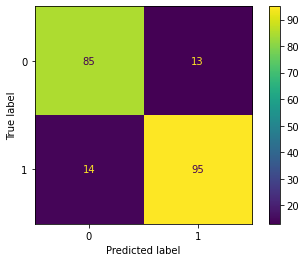

In [55]:
#Visualize Confusion Matrix
plot_confusion_matrix(grid_rfc.best_estimator_, X_test, y_test)

In [56]:
#Evaluate the Metrics
print("Train Scores:")
print(f"Train Accuracy: {accuracy_score(y_train, train_preds)}")
print(f"Train Precision: {precision_score(y_train, train_preds)}")
print(f"Train Recall: {recall_score(y_train, train_preds)}")
print(f"Train F1-Score: {f1_score(y_train, train_preds)}")
print(f"Train Roc-Auc Score: {roc_auc_score(y_train, train_probas)}")
print("---------------")
print("Test Scores:")
print(f"Test Accuracy: {accuracy_score(y_test, test_preds)}")
print(f"Test Precision: {precision_score(y_test, test_preds)}")
print(f"Test Recall: {recall_score(y_test, test_preds)}")
print(f"Test F1-Score: {f1_score(y_test, test_preds)}")
print(f"Test Roc-Auc Score: {roc_auc_score(y_test, test_probas)}")

Train Scores:
Train Accuracy: 0.851373182552504
Train Precision: 0.8523676880222841
Train Recall: 0.8869565217391304
Train F1-Score: 0.8693181818181818
Train Roc-Auc Score: 0.9093568179413943
---------------
Test Scores:
Test Accuracy: 0.8695652173913043
Test Precision: 0.8796296296296297
Test Recall: 0.8715596330275229
Test F1-Score: 0.8755760368663594
Test Roc-Auc Score: 0.9411627036135555
